In [67]:
#import the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

In [68]:
data=pd.read_csv('../input/spotify-chart-data/charts.csv')
data.head()

/opt/conda/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3552: DtypeWarning: Columns (5) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,track_id,name,country,date,position,streams,artists,artist_genres,duration,explicit
0,7GMeRGZax4uDKgz6wALWQw,It Was Always You,br,2015-03-17,138,6584,['Maroon 5'],['pop'],239920,False
1,7GMeRGZax4uDKgz6wALWQw,It Was Always You,br,2015-03-18,132,6963,['Maroon 5'],['pop'],239920,False
2,7GMeRGZax4uDKgz6wALWQw,It Was Always You,br,2015-03-19,128,7049,['Maroon 5'],['pop'],239920,False
3,7GMeRGZax4uDKgz6wALWQw,It Was Always You,br,2015-03-20,152,6976,['Maroon 5'],['pop'],239920,False
4,7GMeRGZax4uDKgz6wALWQw,It Was Always You,br,2015-03-21,160,6156,['Maroon 5'],['pop'],239920,False


In [69]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 626475 entries, 0 to 626474
Data columns (total 10 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   track_id       626475 non-null  object
 1   name           626337 non-null  object
 2   country        626475 non-null  object
 3   date           626475 non-null  object
 4   position       626475 non-null  int64 
 5   streams        626475 non-null  object
 6   artists        626475 non-null  object
 7   artist_genres  626475 non-null  object
 8   duration       626475 non-null  int64 
 9   explicit       626475 non-null  bool  
dtypes: bool(1), int64(2), object(7)
memory usage: 43.6+ MB


In [70]:
data.columns

Index(['track_id', 'name', 'country', 'date', 'position', 'streams', 'artists',
       'artist_genres', 'duration', 'explicit'],
      dtype='object')

In [71]:
data.isna().sum()

track_id           0
name             138
country            0
date               0
position           0
streams            0
artists            0
artist_genres      0
duration           0
explicit           0
dtype: int64

In [72]:
data=data.drop(['track_id'],axis=1)

**Data Preprocessing**

In [73]:
data['artists']=data['artists'].str.replace("^\['|'\]$","")
data['artist_genres']=data['artist_genres'].str.replace("^\['|'\]$","")
data.head()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  """Entry point for launching an IPython kernel.
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  


,name,country,date,position,streams,artists,artist_genres,duration,explicit
0,It Was Always You,br,2015-03-17,138,6584,Maroon 5,pop,239920,False
1,It Was Always You,br,2015-03-18,132,6963,Maroon 5,pop,239920,False
2,It Was Always You,br,2015-03-19,128,7049,Maroon 5,pop,239920,False
3,It Was Always You,br,2015-03-20,152,6976,Maroon 5,pop,239920,False
4,It Was Always You,br,2015-03-21,160,6156,Maroon 5,pop,239920,False


In [74]:
song=data.name.value_counts()[:20]

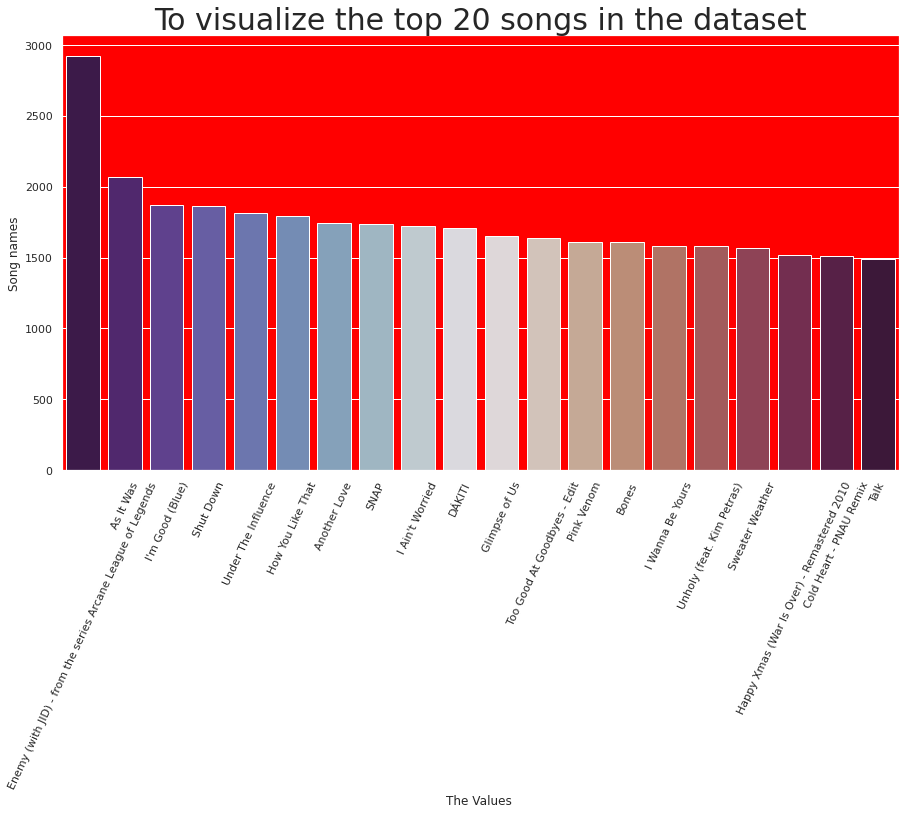

In [75]:
ax=plt.axes()
ax.set(facecolor='red')
sns.set(rc={'figure.figsize':(15,8)})
ax.set_title("To visualize the top 20 songs in the dataset",fontsize=30)
sns.barplot(y=song,x=song.index,palette='twilight_shifted')
plt.xlabel("The Values ")
plt.ylabel("Song names")
plt.xticks(rotation=65)
plt.show()

In [76]:
artists=data.groupby(['artists']).mean()['duration'].sort_values(ascending=False)
artists.head()

artists
Logic', 'Neil deGrasse Tyson                                              728413.000000
TOOL                                                                      714768.023411
Tyler, The Creator', 'Brent Faiyaz', 'Fana Hues                           588139.000000
Don McLean                                                                516893.000000
DJ Khaled', 'Rick Ross', 'Lil Wayne', 'JAY-Z', 'John Legend', 'Fridayy    501648.000000
Name: duration, dtype: float64

In [77]:
name=data.groupby(['name']).mean()['duration'].sort_values(ascending=False)
name.to_frame(name=None)

,duration
name,
7empest,943528.0
Note to Self,875413.0
Invincible,764456.0
AfricAryaN,728413.0
Mortal Man,727106.0
...,...
Sometimes...,36160.0
Paul - Skit,35240.0
Introduction,31200.0


In [78]:
names=pd.DataFrame(data=name,columns=['duration','name'])
names.head()

,duration,name
name,,
7empest,943528.0,NaN
Note to Self,875413.0,NaN
Invincible,764456.0,NaN
AfricAryaN,728413.0,NaN
Mortal Man,727106.0,NaN


In [79]:
streams=data.groupby(['country']).count()['streams'].sort_values(ascending=False).head()
streams=streams.to_frame()
streams.head()

,streams
country,
us,73378
ca,49991
au,22615
gb,22306
nz,21627


**Cover the categorical columns to numerical**

In [80]:
#install the label encoder 
from sklearn.preprocessing import  LabelEncoder
label=LabelEncoder()
data['name']=label.fit_transform(data['name'])
data['country']=label.fit_transform(data['country'])
data['artists']=label.fit_transform(data['artists'])
data['artist_genres']=label.fit_transform(data['artist_genres'])
data['explicit']=label.fit_transform(data['explicit'])

In [81]:
data=data.drop(['date','streams'],axis=1)
data.head()

,name,country,position,artists,artist_genres,duration,explicit
0,2895,7,138,2015,1983,239920,0
1,2895,7,132,2015,1983,239920,0
2,2895,7,128,2015,1983,239920,0
3,2895,7,152,2015,1983,239920,0
4,2895,7,160,2015,1983,239920,0


In [82]:
#divded the x and y values
X=data.drop(['explicit'],axis=1)
y=data['explicit']
#divided the data into train_and_test
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=42)


In [86]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
#model buliding
def model_bulding(model,X_train,X_test,y_train,y_test):
    #fit the model to the train data
    model.fit(X_train,y_train)
    #Prediction 
    y_pred=model.predict(X_test)
    print("---------------------------------------------------------------")
    print("----------------------------------------------------------------")
    #Check the accuracy score
    print(f'the {model} test score is {model.score(X_test,y_test)*100:.2f}')
    print(f'the {model} train score is {model.score(X_train,y_train)*100:.2f}')
    print("-------------------------------------------------------------------")
    print("--------------------------------------------------------------------")
    #accuracy score
    print(f'the accuracy_score test score is {accuracy_score(y_pred,y_test)*100:.2f}')
    print(f'the classification_report test score is {classification_report(y_pred,y_test)}')
    print(f'the confusion_matrix test score is {confusion_matrix(y_pred,y_test)}')
    print("----------------------------------------------------------------------")
    print("-----------------------------------------------------------------------")

**Linear Regression algorithm**

In [85]:
#install the linearregression 
from sklearn.linear_model import LogisticRegression
linear=LogisticRegression()
#let's pridict the model
model_bulding(linear,X_train,X_test,y_train,y_test)

---------------------------------------------------------------
----------------------------------------------------------------
the LogisticRegression() test score is 59.65
the LogisticRegression() train score is 59.76
-------------------------------------------------------------------
--------------------------------------------------------------------
the accuracy_score test score is 59.65
the accuracy_score test score is               precision    recall  f1-score   support

           0       0.96      0.60      0.74    117839
           1       0.08      0.58      0.15      7456

    accuracy                           0.60    125295
   macro avg       0.52      0.59      0.44    125295
weighted avg       0.91      0.60      0.70    125295

the accuracy_score test score is [[70420 47419]
 [ 3138  4318]]
----------------------------------------------------------------------
-----------------------------------------------------------------------


**DecisionTreeClassifier**

In [87]:
#install the decisionTreeclassifier
from sklearn.tree import DecisionTreeClassifier
#install the model
tree=DecisionTreeClassifier()
#let's pridict the model
model_bulding(tree,X_train,X_test,y_train,y_test)

---------------------------------------------------------------
----------------------------------------------------------------
the DecisionTreeClassifier() test score is 99.87
the DecisionTreeClassifier() train score is 99.99
-------------------------------------------------------------------
--------------------------------------------------------------------
the accuracy_score test score is 99.87
the classification_report test score is               precision    recall  f1-score   support

           0       1.00      1.00      1.00     73578
           1       1.00      1.00      1.00     51717

    accuracy                           1.00    125295
   macro avg       1.00      1.00      1.00    125295
weighted avg       1.00      1.00      1.00    125295

the confusion_matrix test score is [[73489    89]
 [   69 51648]]
----------------------------------------------------------------------
-----------------------------------------------------------------------


In [91]:
#install the decisionTreeclassifier
from sklearn.ensemble import RandomForestClassifier
#install the model
random=RandomForestClassifier()
#let's pridict the model
model_bulding(random,X_train,X_test,y_train,y_test)

---------------------------------------------------------------
----------------------------------------------------------------
the RandomForestClassifier() test score is 99.93
the RandomForestClassifier() train score is 99.99
-------------------------------------------------------------------
--------------------------------------------------------------------
the accuracy_score test score is 99.93
the classification_report test score is               precision    recall  f1-score   support

           0       1.00      1.00      1.00     73563
           1       1.00      1.00      1.00     51732

    accuracy                           1.00    125295
   macro avg       1.00      1.00      1.00    125295
weighted avg       1.00      1.00      1.00    125295

the confusion_matrix test score is [[73518    45]
 [   40 51692]]
----------------------------------------------------------------------
-----------------------------------------------------------------------
